In [1]:
import pandas as pd
import matplotclib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [6]:
# Filling in null values
filter_list = ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
               'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE',
               'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']

states = df['STATE'].unique()

for state in states:
    df.loc[df['STATE'] == state, filter_list] = df.loc[df['STATE'] == state, filter_list].interpolate()

# Dropping null values after interpolation is added
df.dropna(inplace=True)

Question 1
Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?

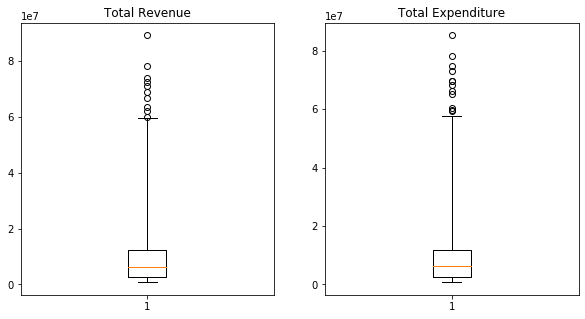

In [19]:
plt.figure(figsize = (10, 5))

plt.subplot(1,2,1)
plt.boxplot(df['TOTAL_REVENUE'], whis = 5)
plt.title('Total Revenue')

plt.subplot(1,2,2)
plt.boxplot(df['TOTAL_EXPENDITURE'], whis = 5)
plt.title('Total Expenditure')
plt.show()

Both have outlier values.

Question 2
If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values afterwards you handled them.

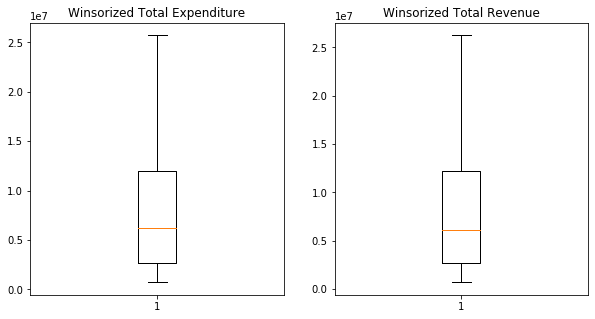

In [31]:
from scipy.stats.mstats import winsorize

w_exp = winsorize(df['TOTAL_EXPENDITURE'], (0, 0.1))
w_rev = winsorize(df['TOTAL_REVENUE'], (0, 0.1))

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.boxplot(w_exp, whis = 5)
plt.title('Winsorized Total Expenditure')

plt.subplot(1,2,2)
plt.boxplot(w_rev, whis = 5)
plt.title('Winsorized Total Revenue')

plt.show()

Outliers have been eliminated.

Question 3
Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable

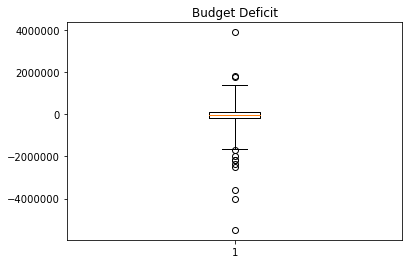

In [23]:
deficit = df.TOTAL_REVENUE - df.TOTAL_EXPENDITURE
plt.boxplot(deficit, whis = 5)
plt.title("Budget Deficit")
plt.show()

There are outliers in the budget deficit.

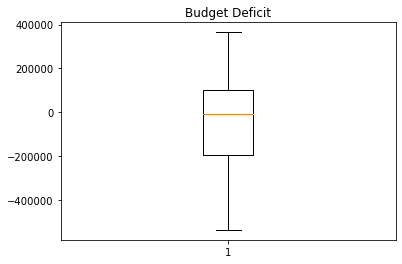

In [30]:
w_budget = winsorize(deficit, (0.1, 0.1))
plt.boxplot(w_budget, whis = 5)
plt.title('Budget Deficit')
plt.show()

Question 4
Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. But this time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

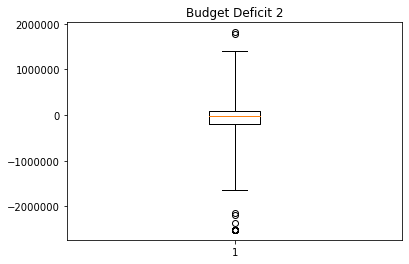

In [27]:
deficit2 = w_rev - w_exp
plt.boxplot(deficit2, whis = 5)
plt.title('Budget Deficit 2')
plt.show()

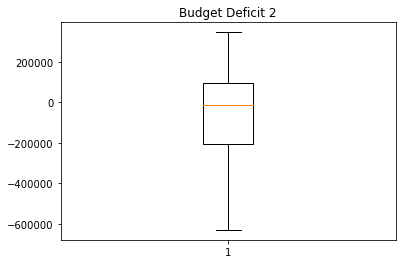

In [29]:
w_budget2 = winsorize(deficit2, (0.1, 0.1))
plt.boxplot(w_budget2, whis = 5)
plt.title('Budget Deficit 2')
plt.show()

Question 5
Compare some basic statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [34]:
pd.DataFrame({'Budget': deficit, 'Winsorized Budget': w_budget,
              'Winsorized Budget 2': w_budget2}).describe()

,Budget,Winsorized Budget,Winsorized Budget 2
count,4.660000e+02,466.000000,466.000000
mean,-8.094882e+04,-46221.075107,-65786.019313
std,6.144222e+05,256023.510074,275351.713657
min,-5.487742e+06,-538253.000000,-630307.000000
25%,-1.965748e+05,-196574.750000,-204775.000000
50%,-8.872500e+03,-8872.500000,-12823.500000
75%,1.013948e+05,101394.750000,98263.000000
max,3.897129e+06,365079.000000,347190.000000


It looks like eliminating the outliers has had varying impact on all the means.

Question 6
If our variable of interest is the budget deficit variable, which method do you think is the most appropriate one in dealing with the outliers in this variable. The method in the third question or the one in the fourth question?

I would say using the technique in the third question would be better, you are not processing out any variables until the end of viewing the data.